In [14]:
import qutip as qt
import numpy as np

# Tracking info of simulations 
import tqdm
import time
import warnings

#Saving data
import pandas as pd
import json
import os

import matplotlib.pyplot as plt
from IPython.display import Image
from matplotlib.gridspec import GridSpec

In [15]:
import sys
sys.path.append('/Users/omichel/Desktop/qilimanjaro/projects/quantum_transport/quantum_state_transfer/src')

import model_building as md
import Hamiltonian as Ham
import dynamics as dyn
import data_handling as dh
import plots as plots

In [22]:
a = 0
b = 1
N = 15
lmd = 0.5

initial_state = md.initialize_1_qubit_system(N, a, b, 'Alice')
target_state  = md.initialize_1_qubit_system(N, a, b, 'Bob')

In [23]:
H = Ham.Hamiltonian(N, 'standard', lmd)

In [24]:
ti = 0
tf = 10
Nstep = 5000

fidelity, magnetization = dyn.OneStepAlgorithm(initial_state, target_state, H, ti, tf, Nstep)

In [25]:
print(max(fidelity))

0.9999999947811449


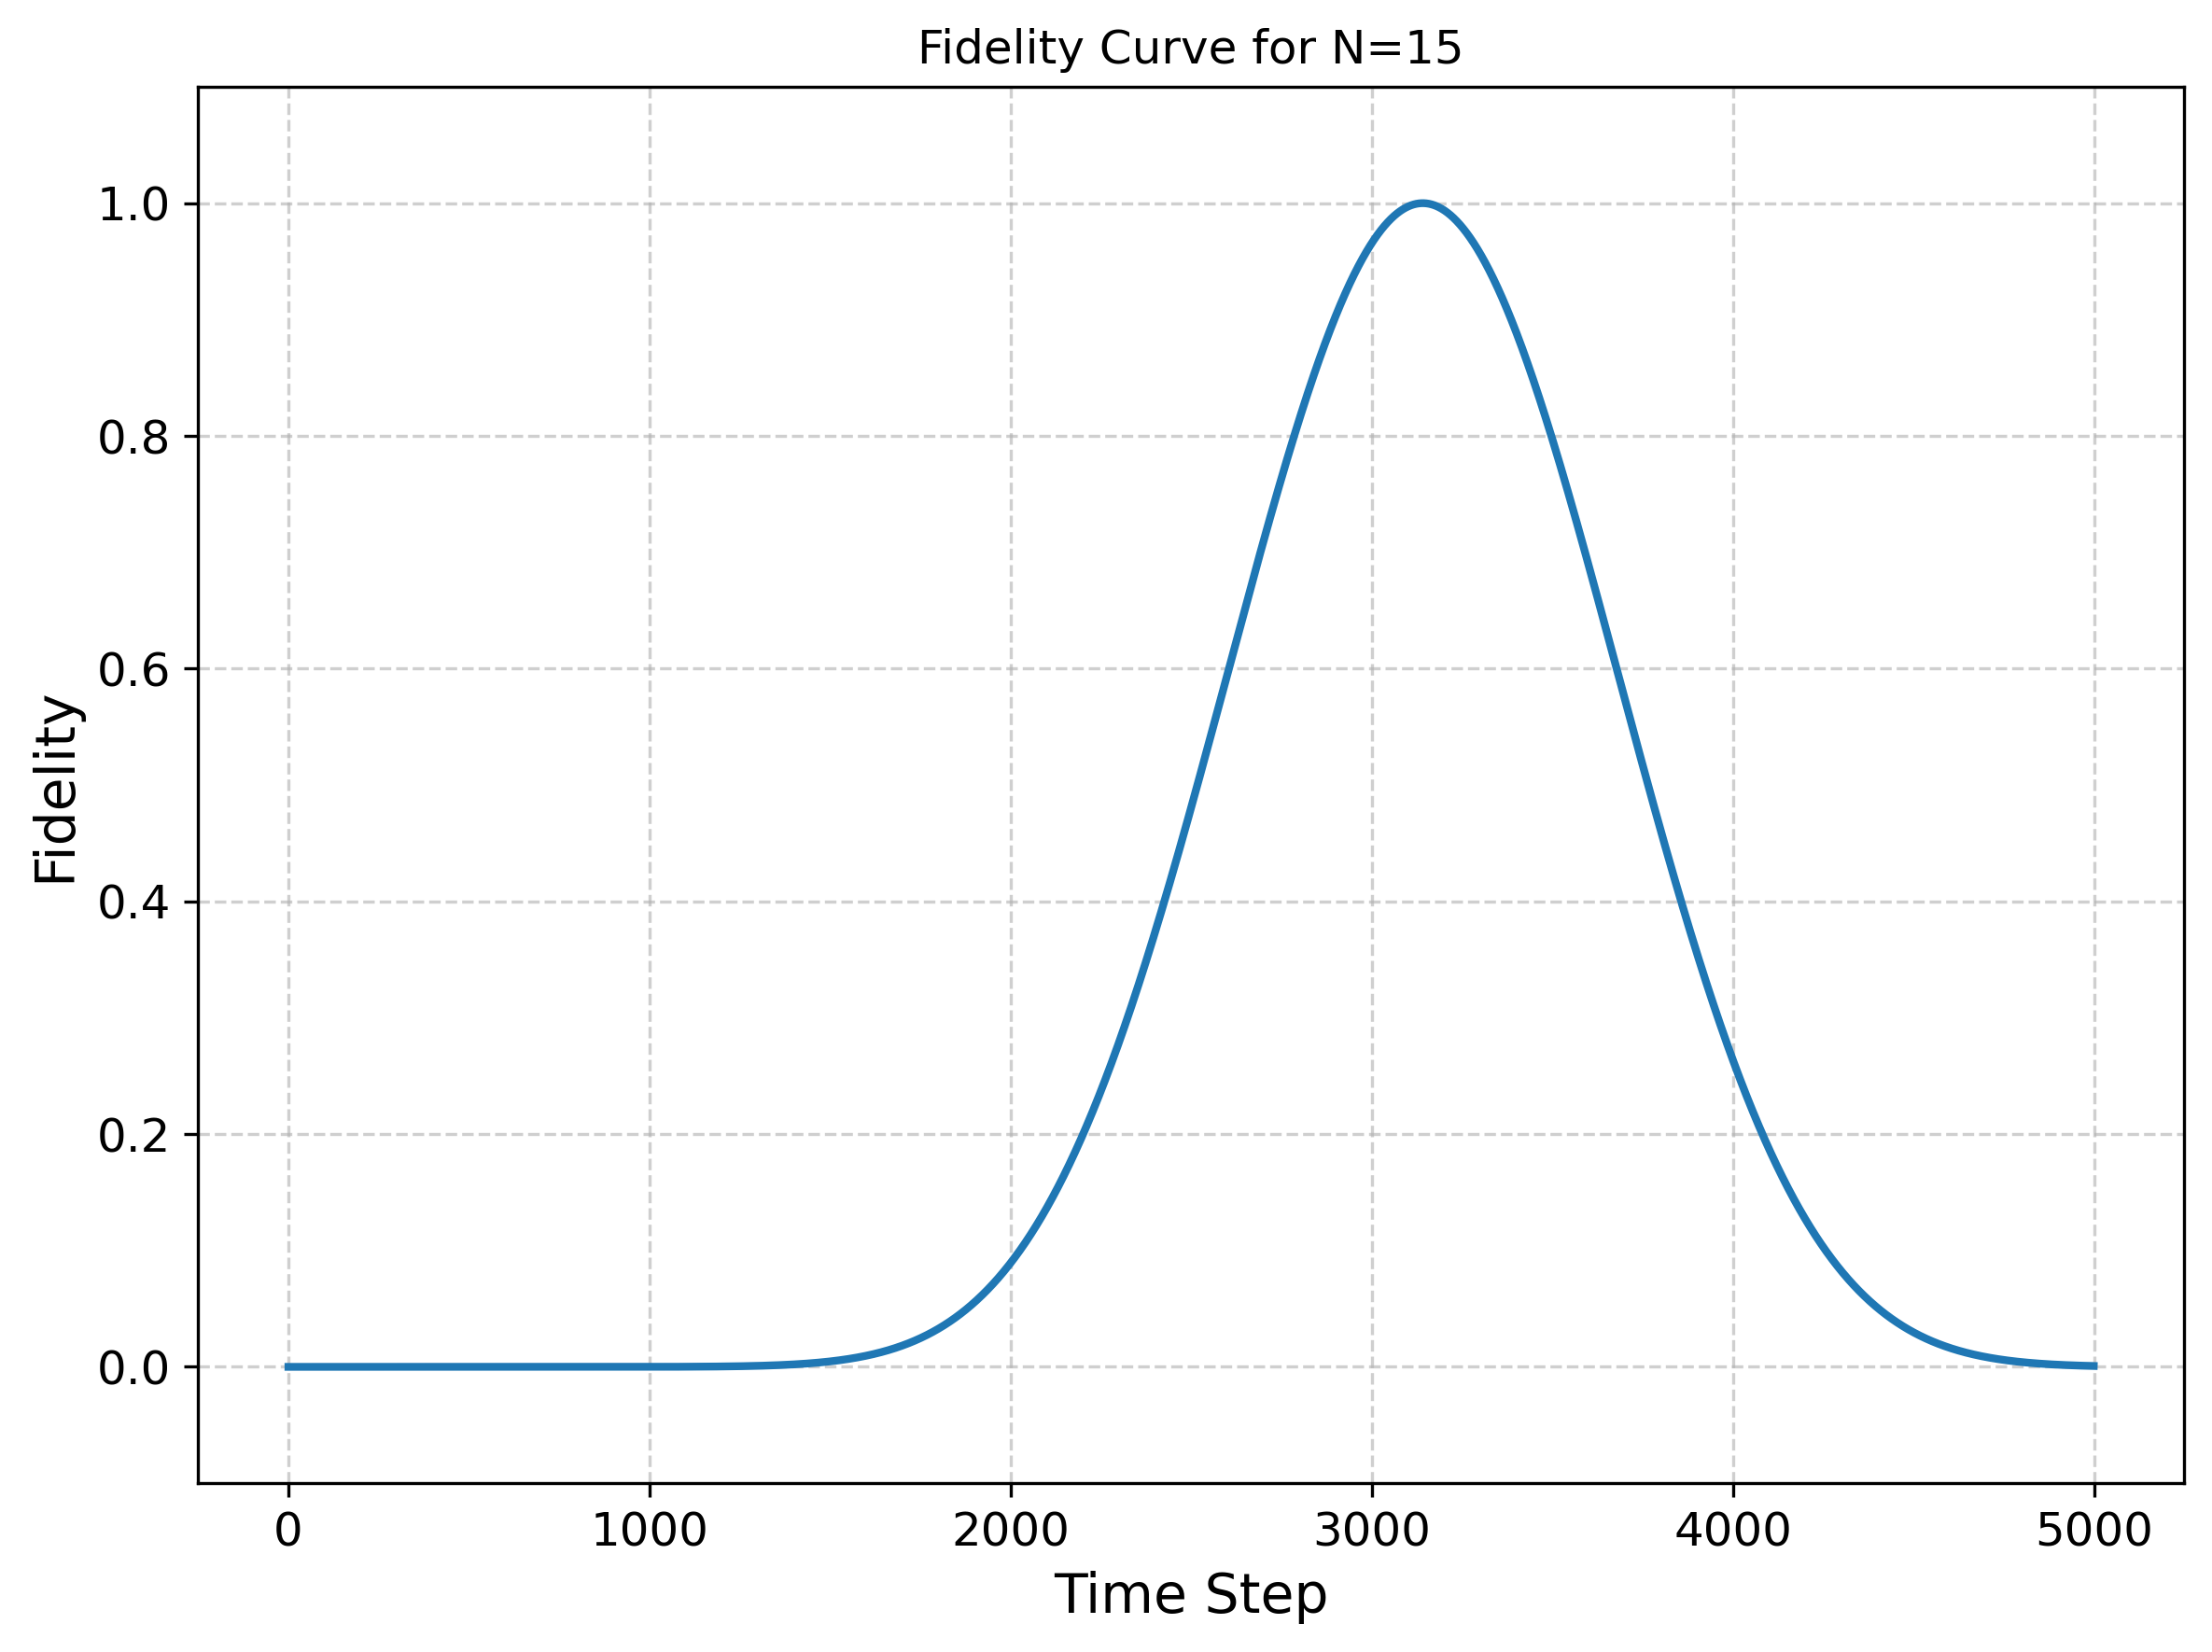

In [26]:
plots.plot_test_fidelity(fidelity, N)

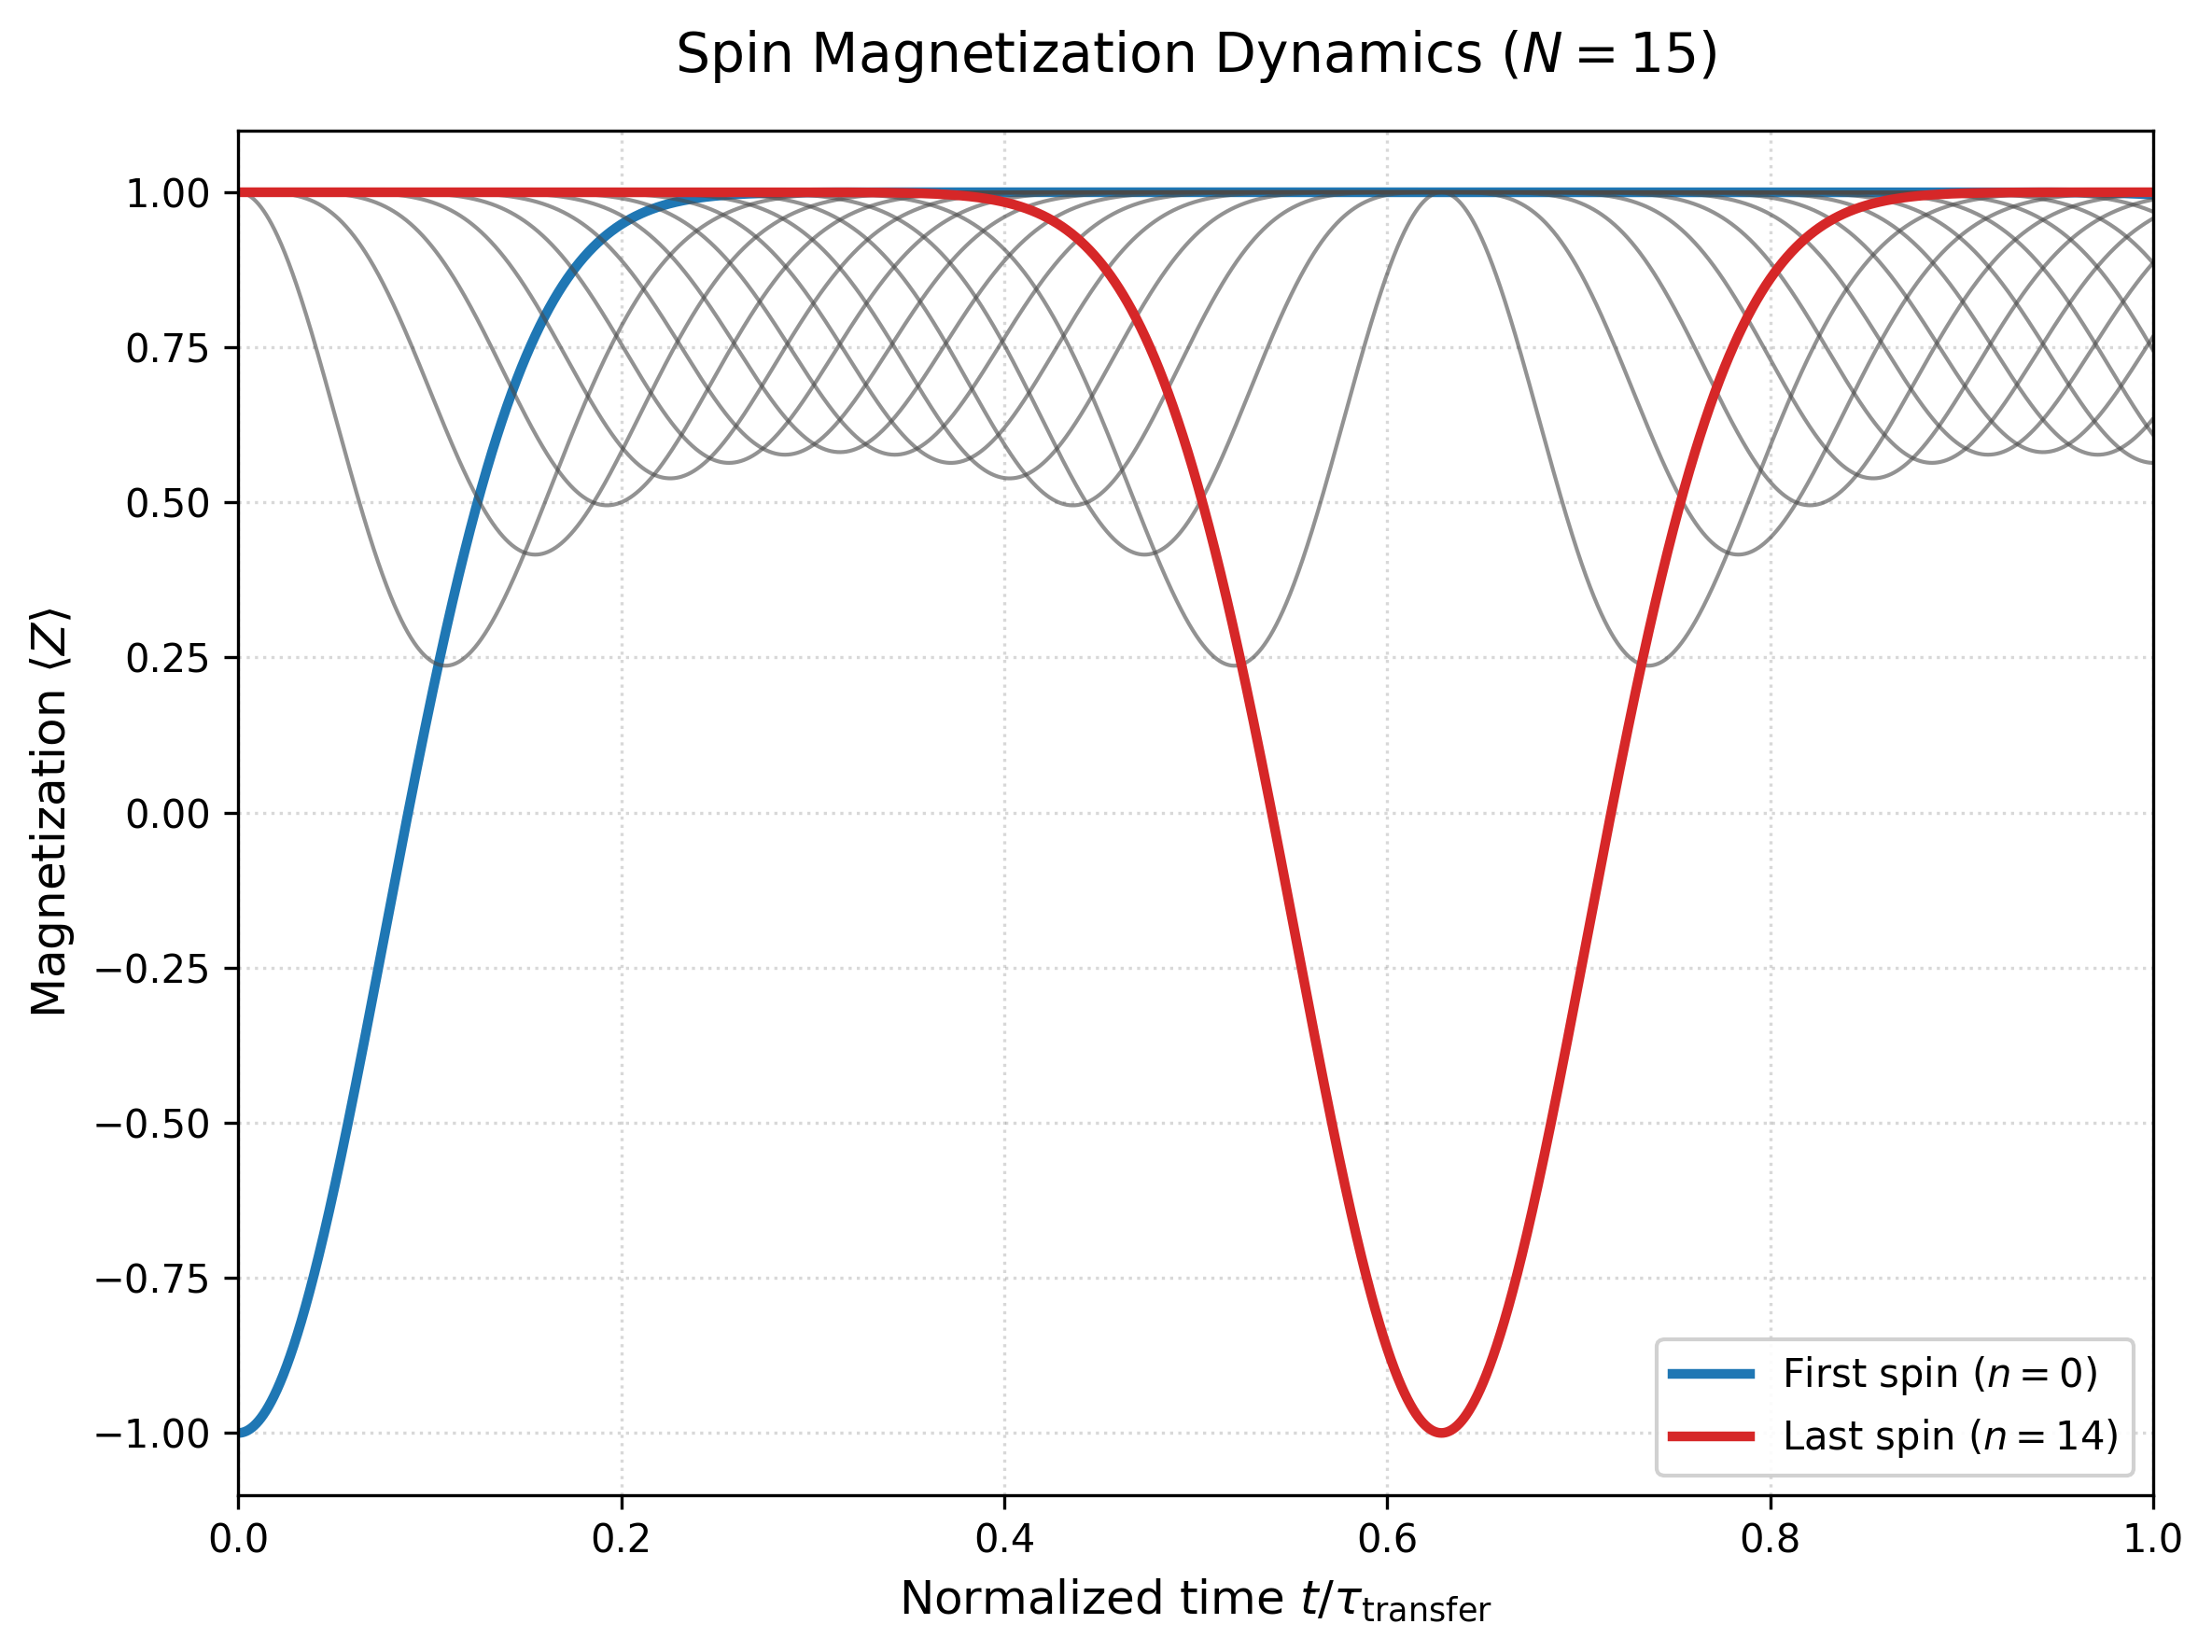

In [27]:
plots.plot_test_z_expectations(magnetization, N)